In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
hibiya = pd.read_csv('data/gmonpro_20221207_085354_Sim1_44011.csv', header=None)

In [4]:
hibiya.head(3)

,0
0,PLMN;SYSTEM;XCI;xNBID;LOCAL_CID;LAC/TAC;PCI/PS...
1,44011;4;71727112;280184;8;211;31;1575;1800 B3;...
2,44011;4;71727112;280184;8;211;31;1575;1800 B3;...


In [5]:
hibiya = hibiya[0].str.split(';', expand=True)
hibiya.columns = hibiya.iloc[0]
hibiya.drop(0, inplace=True)
hibiya.reset_index(drop=True, inplace=True)

In [6]:
hibiya.rename(columns={'PCI/PSC/BSIC':'PCI', 'RSRP/RSCP':'RSRP', 'RSRQ/ECIO':'RSRQ', 'SNR':'SINR', 'LAT':'LAT_org', 'LON':'LON_org', 'TIME':'TIME_org'}, inplace=True)
hibiya.insert(0, 'LON', hibiya['LON_org'])
hibiya.insert(0, 'LAT', hibiya['LAT_org'])
hibiya.insert(0, 'TIME', hibiya['TIME_org'])
hibiya.drop(['LON_org', 'LAT_org', 'TIME_org'], axis=1, inplace=True)

In [7]:
hibiya.head(3)

,TIME,LAT,LON,PLMN,SYSTEM,XCI,xNBID,LOCAL_CID,LAC/TAC,PCI,ARFCN,BAND,RSSI,RSRP,RSRQ,SINR,CQI,TA,DISTANCE,DELTA_AZI,SPEED,GPS_ACCURACY,UL,DL,BANDWIDTH,BANDWIDTHS,CA,NR_STATE,NARFCN,NR_BAND,NR_PCI,NR_SS_RSRP,NR_SS_RSRQ,NR_SS_SINR,NR_CSI_RSRP,NR_CSI_RSRQ,NR_CSI_SINR,CLF_LABEL,CLF_LOC,CLF_DESC,DATE,ROAMING
0,08:53:54,35.732882,139.795405,44011,4,71727112,280184,8,211,31,1575,1800 B3,-67,-86,-6,1.6,,180,,,0,1200,61,1227,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
1,08:53:55,35.732882,139.795405,44011,4,71727112,280184,8,211,31,1575,1800 B3,-67,-86,-6,1.6,,180,,,0,1200,46,953,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
2,08:53:56,35.732882,139.795405,44011,4,71727112,280184,8,211,31,1575,1800 B3,-67,-84,-6,1.6,,180,,,0,1200,56,1084,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME


In [8]:
hibiya.insert(0, 'STATION', None)

In [9]:
'''
08:54:46 Depart Minowa
08:55:53 Arrive Iriya
08:56:57 Depart Iriya
08:58:05 Arrive Ueno
08:59:17 Depart Ueno
09:00:04 Arrive Nakaokachimachi
09:01:17 Depart Nakaokachimachi
09:02:14 ArriveAkihabara
''';

In [10]:
print(hibiya.loc[hibiya['TIME']=='08:54:46'].index.values)
print(hibiya.loc[hibiya['TIME']=='08:55:53'].index.values)
print(hibiya.loc[hibiya['TIME']=='08:56:57'].index.values)
print(hibiya.loc[hibiya['TIME']=='08:58:05'].index.values)
print(hibiya.loc[hibiya['TIME']=='08:59:17'].index.values)
print(hibiya.loc[hibiya['TIME']=='09:00:04'].index.values)
print(hibiya.loc[hibiya['TIME']=='09:01:17'].index.values)
print(hibiya.loc[hibiya['TIME']=='09:02:14'].index.values)

[52]
[119]
[183]
[251]
[323]
[370]
[443]
[499]


In [11]:
hibiya.loc[0:52,'STATION'] = '01. Minowa'
hibiya.loc[53:119,'STATION'] = '02. Minowa-Iriya Tunnel'
hibiya.loc[120:183,'STATION'] = '03. Iriya'
hibiya.loc[184:251,'STATION'] = '04. Iriya-Ueno Tunnel'
hibiya.loc[252:323,'STATION'] = '05. Ueno'
hibiya.loc[324:370,'STATION'] = '06. Ueno-Nakaokachimachi Tunnel'
hibiya.loc[371:443,'STATION'] = '07. Nakaokachimachi'
hibiya.loc[444:499,'STATION'] = '08. Nakaokachimachi-Akihabara Tunnel'
hibiya.loc[500:,'STATION'] = '09. Akihabara'

In [12]:
hibiya.head(3)

,STATION,TIME,LAT,LON,PLMN,SYSTEM,XCI,xNBID,LOCAL_CID,LAC/TAC,PCI,ARFCN,BAND,RSSI,RSRP,RSRQ,SINR,CQI,TA,DISTANCE,DELTA_AZI,SPEED,GPS_ACCURACY,UL,DL,BANDWIDTH,BANDWIDTHS,CA,NR_STATE,NARFCN,NR_BAND,NR_PCI,NR_SS_RSRP,NR_SS_RSRQ,NR_SS_SINR,NR_CSI_RSRP,NR_CSI_RSRQ,NR_CSI_SINR,CLF_LABEL,CLF_LOC,CLF_DESC,DATE,ROAMING
0,01. Minowa,08:53:54,35.732882,139.795405,44011,4,71727112,280184,8,211,31,1575,1800 B3,-67,-86,-6,1.6,,180,,,0,1200,61,1227,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
1,01. Minowa,08:53:55,35.732882,139.795405,44011,4,71727112,280184,8,211,31,1575,1800 B3,-67,-86,-6,1.6,,180,,,0,1200,46,953,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
2,01. Minowa,08:53:56,35.732882,139.795405,44011,4,71727112,280184,8,211,31,1575,1800 B3,-67,-84,-6,1.6,,180,,,0,1200,56,1084,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME


In [13]:
hibiya.tail(3)

,STATION,TIME,LAT,LON,PLMN,SYSTEM,XCI,xNBID,LOCAL_CID,LAC/TAC,PCI,ARFCN,BAND,RSSI,RSRP,RSRQ,SINR,CQI,TA,DISTANCE,DELTA_AZI,SPEED,GPS_ACCURACY,UL,DL,BANDWIDTH,BANDWIDTHS,CA,NR_STATE,NARFCN,NR_BAND,NR_PCI,NR_SS_RSRP,NR_SS_RSRQ,NR_SS_SINR,NR_CSI_RSRP,NR_CSI_RSRQ,NR_CSI_SINR,CLF_LABEL,CLF_LOC,CLF_DESC,DATE,ROAMING
517,09. Akihabara,09:02:32,35.698174,139.775543,44011,4,71644420,279861,4,211,351,1575,1800 B3,-89,-105,-6,0.5,,173,,,14,37,18,17,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
518,09. Akihabara,09:02:33,35.698174,139.775543,44011,4,71644420,279861,4,211,351,1575,1800 B3,-89,-105,-6,0.5,,173,,,14,37,0,0,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME
519,09. Akihabara,09:02:34,35.698174,139.775543,44011,4,71644420,279861,4,211,351,1575,1800 B3,-89,-105,-6,0.5,,173,,,14,37,0,0,20000,20,1,none,,,,,,,,,,--,--,Cell not found in the clf database!,2022/12/07,HOME


In [14]:
print(hibiya['BAND'].unique())

['1800 B3']


In [15]:
hibiya_band_mask = hibiya['BAND'].str.split(' ', expand=True)
hibiya['BAND'] = hibiya_band_mask[1]

In [16]:
cols = ['PCI', 'ARFCN', 'BAND', 'RSSI', 'RSRP', 'RSRQ', 'SINR', 'CQI', 'TA']
for i in cols:
    hibiya[i] = pd.to_numeric(hibiya[i], errors='coerce')

In [17]:
hibiya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION       520 non-null    object 
 1   TIME          520 non-null    object 
 2   LAT           520 non-null    object 
 3   LON           520 non-null    object 
 4   PLMN          520 non-null    object 
 5   SYSTEM        520 non-null    object 
 6   XCI           520 non-null    object 
 7   xNBID         520 non-null    object 
 8   LOCAL_CID     520 non-null    object 
 9   LAC/TAC       520 non-null    object 
 10  PCI           520 non-null    int64  
 11  ARFCN         520 non-null    int64  
 12  BAND          0 non-null      float64
 13  RSSI          520 non-null    int64  
 14  RSRP          520 non-null    int64  
 15  RSRQ          520 non-null    int64  
 16  SINR          520 non-null    float64
 17  CQI           0 non-null      float64
 18  TA            512 non-null    

In [18]:
def ctgrzrsrp(dfname, columnname):
    a = (-75 <= dfname[columnname])
    b = (dfname[columnname] < -125)
    dfname['Sort_'+columnname] = None
    dfname.loc[a, 'Sort_'+columnname] = '-75 <= rp'
    dfname.loc[b, 'Sort_'+columnname] = 'rp < -125'
    
    for i in range(-75, -125, -5):
        locals()['Var_{}'.format(i)] = (i-5 <= dfname[columnname]) & (dfname[columnname] < i) 
        dfname.loc[locals()['Var_{}'.format(i)], 'Sort_'+columnname] = str(i-5)+' <= rp < '+str(i)

In [19]:
ctgrzrsrp(hibiya, 'RSRP')

In [20]:
hibiya['Sort_RSRP'].unique()

array(['-90 <= rp < -85', '-85 <= rp < -80', '-95 <= rp < -90',
       '-105 <= rp < -100', '-100 <= rp < -95', '-80 <= rp < -75',
       '-110 <= rp < -105', '-115 <= rp < -110', '-120 <= rp < -115',
       'rp < -125', '-125 <= rp < -120'], dtype=object)

In [21]:
hibiya['Sort_RSRP'].replace({'-75 <= rp':'A: -75 <= rp', '-80 <= rp < -75':'B: -80 <= rp < -75',
                             '-85 <= rp < -80':'C: -85 <= rp < -80', '-90 <= rp < -85':'D: -90 <= rp < -85',
                             '-95 <= rp < -90':'E: -95 <= rp < -90', '-100 <= rp < -95':'F: -100 <= rp < -95',
                             '-105 <= rp < -100':'G: -105 <= rp < -100', '-110 <= rp < -105':'H: -110 <= rp < -105', 
                             '-115 <= rp < -110':'I: -115 <= rp < -110', '-120 <= rp < -115':'J: -120 <= rp < -115',
                             '-125 <= rp < -120':'K: -125 <= rp < -120', 'rp < -125':'L: rp < -125'}, inplace=True)

In [22]:
# hibiya_bar = hibiya['Sort_RSRP'].value_counts(normalize=True).mul(100).round(2).sort_index(ascending=True).reset_index().T

In [23]:
'''hibiya_bar.columns = hibiya_bar.iloc[0]
hibiya_bar.drop('index', inplace=True)
hibiya_bar = hibiya_bar.rename_axis(columns={'index':None})''';

In [24]:
hibiya_bar = hibiya.groupby(['STATION'])['Sort_RSRP'].value_counts(normalize=True).mul(100).round(2).unstack().reset_index()

In [25]:
hibiya_bar

Sort_RSRP,STATION,B: -80 <= rp < -75,C: -85 <= rp < -80,D: -90 <= rp < -85,E: -95 <= rp < -90,F: -100 <= rp < -95,G: -105 <= rp < -100,H: -110 <= rp < -105,I: -115 <= rp < -110,J: -120 <= rp < -115,K: -125 <= rp < -120,L: rp < -125
0,01. Minowa,NaN,7.55,26.42,43.40,9.43,13.21,NaN,NaN,NaN,NaN,NaN
1,02. Minowa-Iriya Tunnel,10.45,34.33,29.85,22.39,NaN,2.99,NaN,NaN,NaN,NaN,NaN
2,03. Iriya,NaN,NaN,4.69,25.00,17.19,17.19,35.94,NaN,NaN,NaN,NaN
3,04. Iriya-Ueno Tunnel,2.94,19.12,13.24,27.94,20.59,5.88,10.29,NaN,NaN,NaN,NaN
4,05. Ueno,NaN,NaN,9.72,26.39,27.78,29.17,6.94,NaN,NaN,NaN,NaN
5,06. Ueno-Nakaokachimachi Tunnel,10.64,4.26,27.66,27.66,17.02,8.51,4.26,NaN,NaN,NaN,NaN
6,07. Nakaokachimachi,NaN,NaN,NaN,5.48,38.36,45.21,6.85,4.11,NaN,NaN,NaN
7,08. Nakaokachimachi-Akihabara Tunnel,8.93,26.79,30.36,21.43,10.71,1.79,NaN,NaN,NaN,NaN,NaN
8,09. Akihabara,NaN,NaN,NaN,15.00,10.00,35.00,NaN,NaN,15.0,10.0,15.0


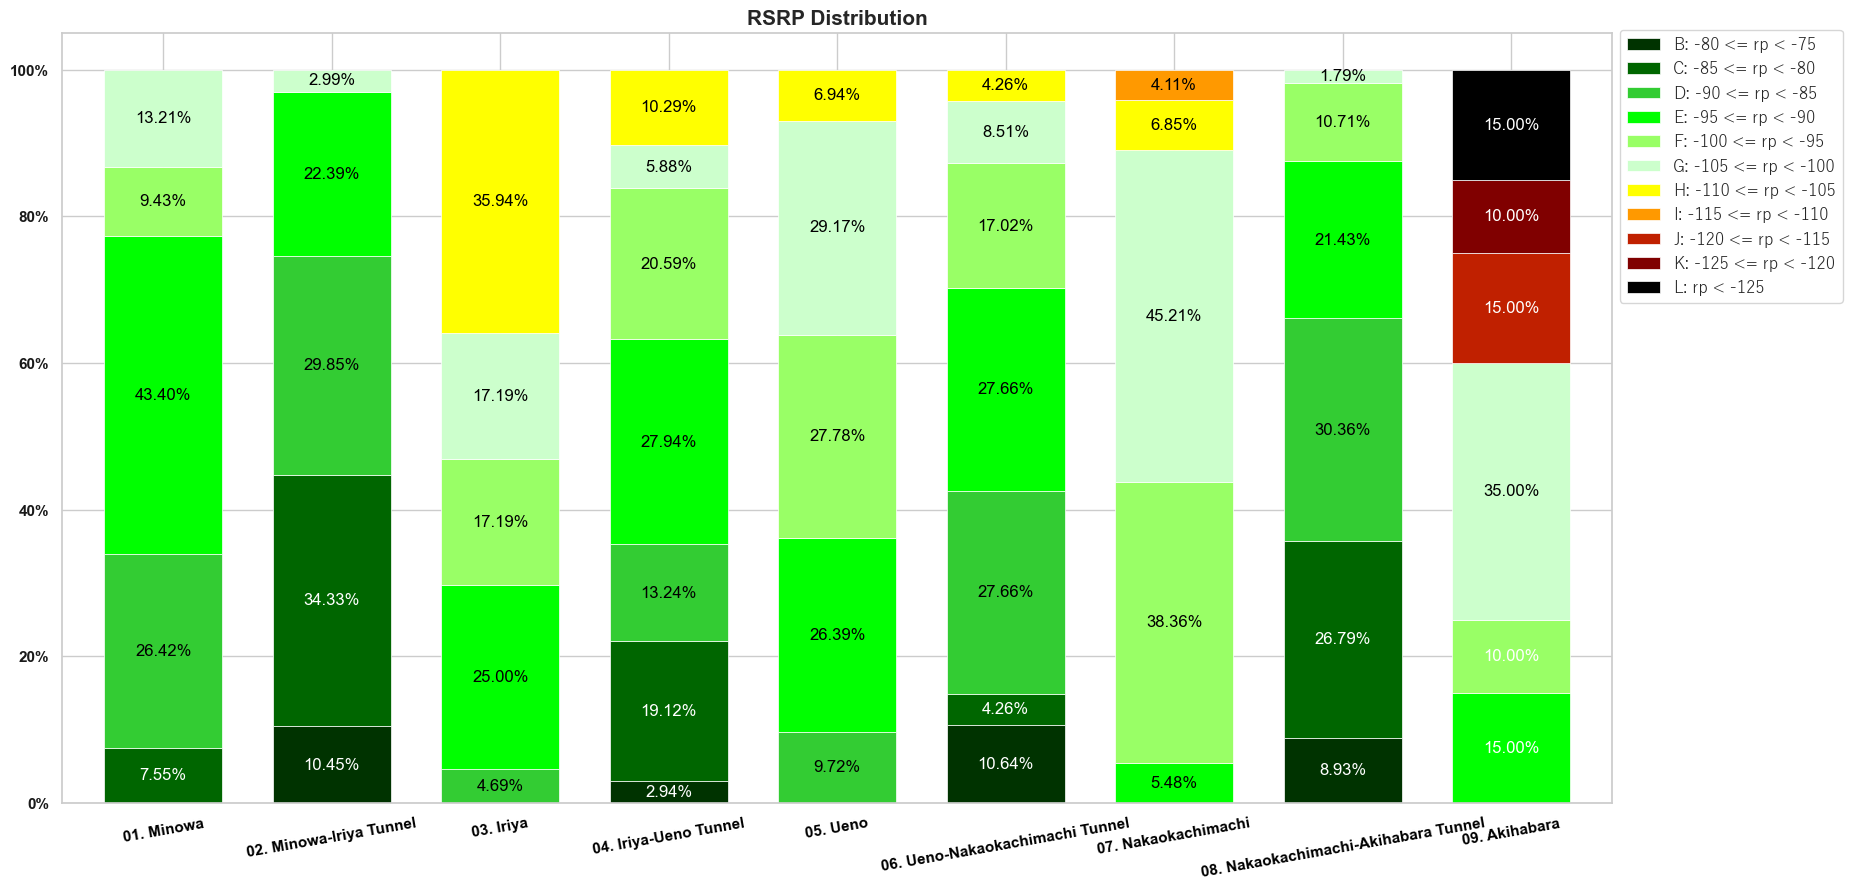

In [26]:
from matplotlib.ticker import FuncFormatter
plt.close()
plt.style.use('default')
sns.set(style='whitegrid', rc={'figure.figsize':(20, 10)})
ax = hibiya_bar.plot(  
     kind = 'bar', 
     stacked = True, 
     title = '', 
     mark_right = True, 
     color =['#003300', '#006600', '#33CC33', '#00FF00', '#99FF66', '#CCFFCC', '#FFFF00', '#FF9900', '#C02000', '#800000', '#000000'],
     width = 0.7,
     edgecolor = 'white',
     linewidth=0.5 
) 
#'#0000FF', '#003300', '#006600', '#33CC33', '#00FF00', '#99FF66', '#CCFFCC', '#FFFF00', '#FF9900', '#C02000', '#800000', '#000000'
labels = ['01. Minowa', '02. Minowa-Iriya Tunnel', '03. Iriya', 
          '04. Iriya-Ueno Tunnel', '05. Ueno', '06. Ueno-Nakaokachimachi Tunnel',
          '07. Nakaokachimachi', '08. Nakaokachimachi-Akihabara Tunnel', '09. Akihabara']

plt.legend(prop={"family":"Yu Gothic","size":12}, bbox_to_anchor=(1.005, 1.004), loc=2, borderaxespad=0.)

putwhiteblocks = hibiya_bar.loc[:,['B: -80 <= rp < -75', 'C: -85 <= rp < -80', 'K: -125 <= rp < -120', 'L: rp < -125']]

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if height<1: continue
    if np.isin(height, putwhiteblocks):
        ax.annotate("{0:.2f}%".format(height), xy=(left + width / 2, bottom + height / 2), ha='center', va='center',
                    color="white", fontsize=12)
    else:
        ax.annotate("{0:.2f}%".format(height), xy=(left + width / 2, bottom + height / 2), ha='center', va='center', 
                    color='black', fontsize=12)

#ax.set_facecolor('#D9D9D9')
#plt.xlabel('RSRP Distribution')
ax.set_title('RSRP Distribution', fontsize=15, fontweight='bold')
#ax.axes.xaxis.set_visible(False)
plt.xticks(color='black', weight='bold', rotation=10)
plt.yticks(color='k', weight='bold')
#ax.suptitle('RSRP vs RSRQ', fontsize=20, fontweight='bold')
#ax.text(0.0, -4, 'RSRP', ha='center', va='center', fontsize=13)
#ax.text(0.02, 0.5, 'RSRQ (dB)', ha='center', va='center', rotation='vertical', fontsize=17, fontweight='bold')
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
plt.show()

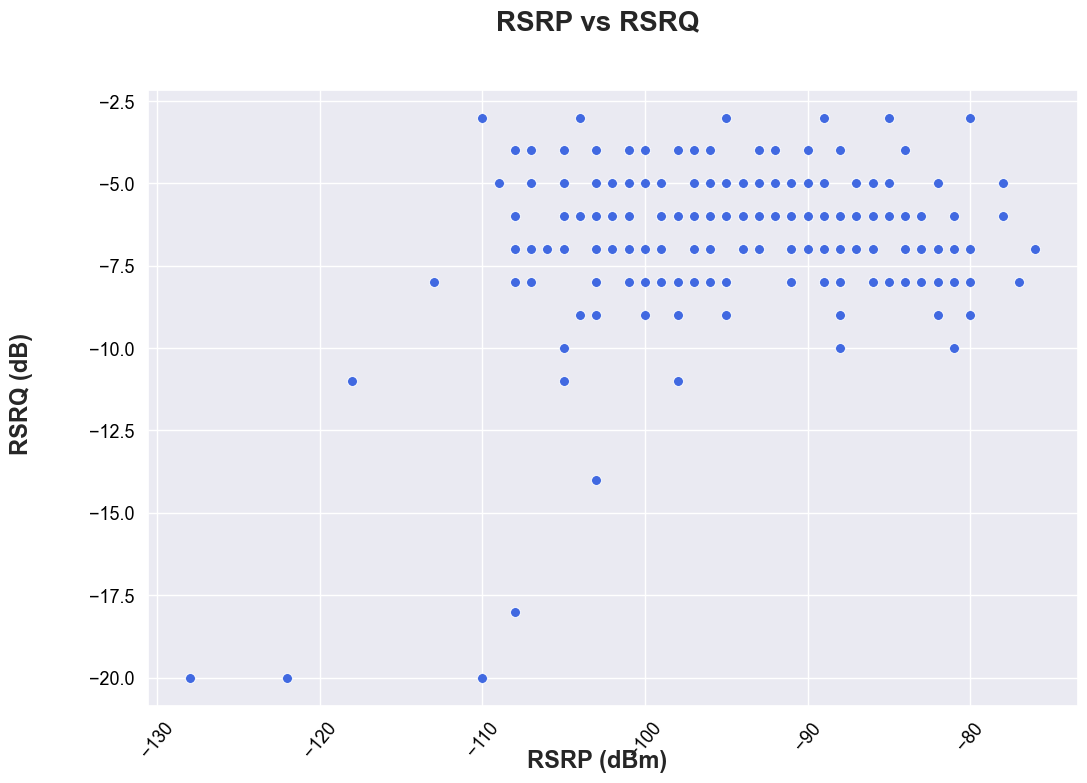

In [27]:
#plt.style.use('ggplot')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(data=hibiya, x='RSRP', y='RSRQ', color = 'royalblue', s=50)
ax.set(xlabel='', ylabel='')
fig.suptitle('RSRP vs RSRQ', fontname="Arial", fontsize=20, fontweight='bold')
fig.text(0.5, 0.04, 'RSRP (dBm)', ha='center', va='center', fontname="Arial", fontsize=17, fontweight='bold')
fig.text(0.02, 0.5, 'RSRQ (dB)', ha='center', va='center', fontname="Arial", rotation='vertical', fontsize=17, fontweight='bold')
#ax.yaxis.get_label().set_fontsize(15)
#ax.yaxis.label.set_color('#51585E')
ax.tick_params('x', labelrotation=50)
#ax.tick_params('y', labelrotation=50)
#ax.set_xticks(np.arange(-125, -55, step=5))
#ax.set_yticks(np.arange(-20, -4, step=2))
#ax.set_yticklabels(('', 50, 100, 150, 200, 250, 300), color='k', size=13)
#ax.set_xticklabels(('', -110, -100, -90, -80, -70, -60), color='k', size=13);
plt.setp(ax.get_yticklabels(), color="black", size=13)
plt.setp(ax.get_xticklabels(), color="black", size=13);
#for ax in fig.axes:
#    ax.tick_params(labelrotation=70);